In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
sns.set(color_codes=True)
#sns.set(font_scale=.5)
sns.set_style("white")

df = pd.read_csv(r'~/Documents/QualComp.csv')
dfC = pd.read_csv(r'~/Documents/Carry.csv')
dfInd = pd.read_csv(r'~/Documents/QualCompInd.csv')
df

,ID,k,K,delta,b,I0,r,P0,maxViral,TimeMax,cumViral,transmission,latent period,infect period
0,SAT1,0.114331,6.803884,1.846246,0.330213,2.621697,3.481154,0.008500,6.755854,3.689919,28.960281,3.57,0.63,5.76
1,SAT2,0.155388,5.681303,2.531628,0.723336,2.393748,2.230398,0.010000,5.147607,4.583383,14.194865,2.33,1.38,4.71
2,SAT3,0.067833,8.927389,1.956448,0.433351,2.810342,1.474534,0.014776,7.485831,6.239015,23.413533,1.92,3.03,4.30


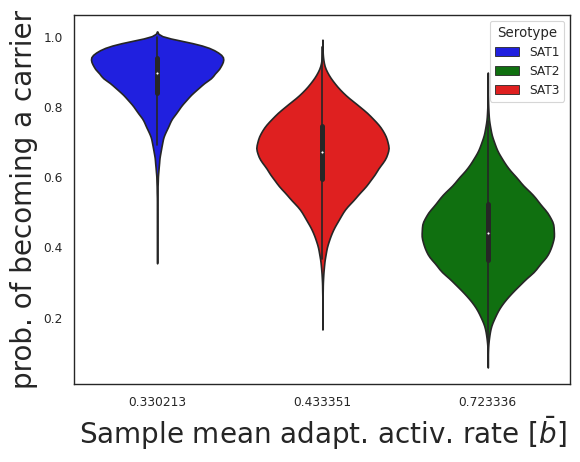

/home/anon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


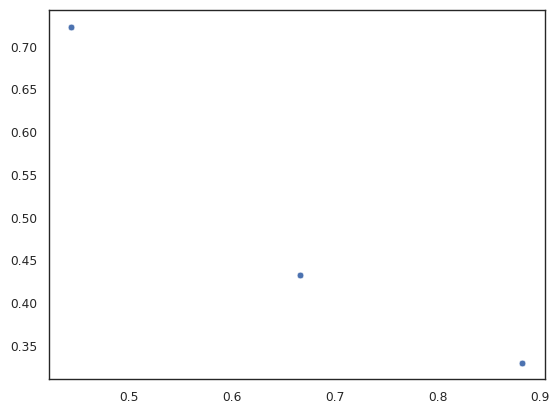

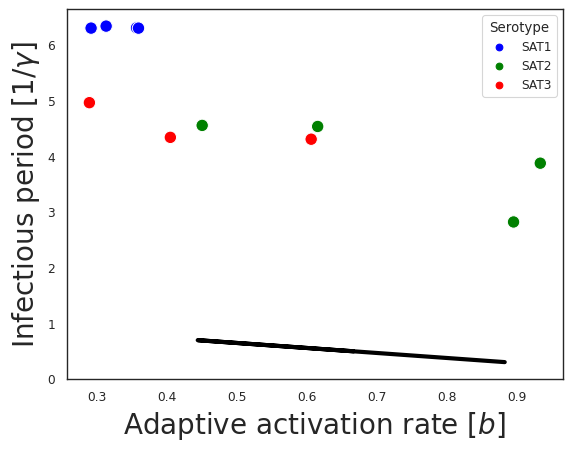

[-0.89903988]


In [5]:
dfC

h = sns.violinplot(data=dfC, x="MeanAct", y="MakeCar",hue="Serotype",palette=['blue','green','red'],dodge =False
                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Sample mean adapt. activ. rate [$\bar{b}$]" , size = 20 ) 
h.set_ylabel( r"prob. of becoming a carrier" , size = 20 ) 
#h.set_title( r"Adaptive Response Clearence Rate" , size = 16 ) 
plt.show()

dfS1 = dfC.loc[dfC['Serotype'] == 'SAT1']
xS1 = np.mean(dfS1['MakeCar'].values)
dfS2 = dfC.loc[dfC['Serotype'] == 'SAT2']
xS2 = np.mean(dfS2['MakeCar'].values)
dfS3 = dfC.loc[dfC['Serotype'] == 'SAT3']
xS3 = np.mean(dfS3['MakeCar'].values)
xs = np.array([xS1,xS2,xS3])
ys = df['b'].values

sns.scatterplot(xs,ys)
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = xs
X = X.reshape(-1,1)
y = ys
reg = LinearRegression().fit(X, y)

sns.set_context("paper", rc={"axes.labelsize":20})
plt.xlabel(r'Adaptive activation rate [$b$]')
plt.ylabel(r'Infectious period [$1/\gamma$]')
plt.plot(X, reg.predict(X),color='black',linewidth=3)
# s='1/γ = g(b)';
# plt.text(.5, 5.1, s, fontsize=16)
# plt.text(.7,6.25,'$R^2$= 0.669')
h = sns.scatterplot(data=dfInd, x="b", y=dfInd["infectPeriod"],hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.show()

#r2_score(y, reg.predict(X))
print(reg.coef_)

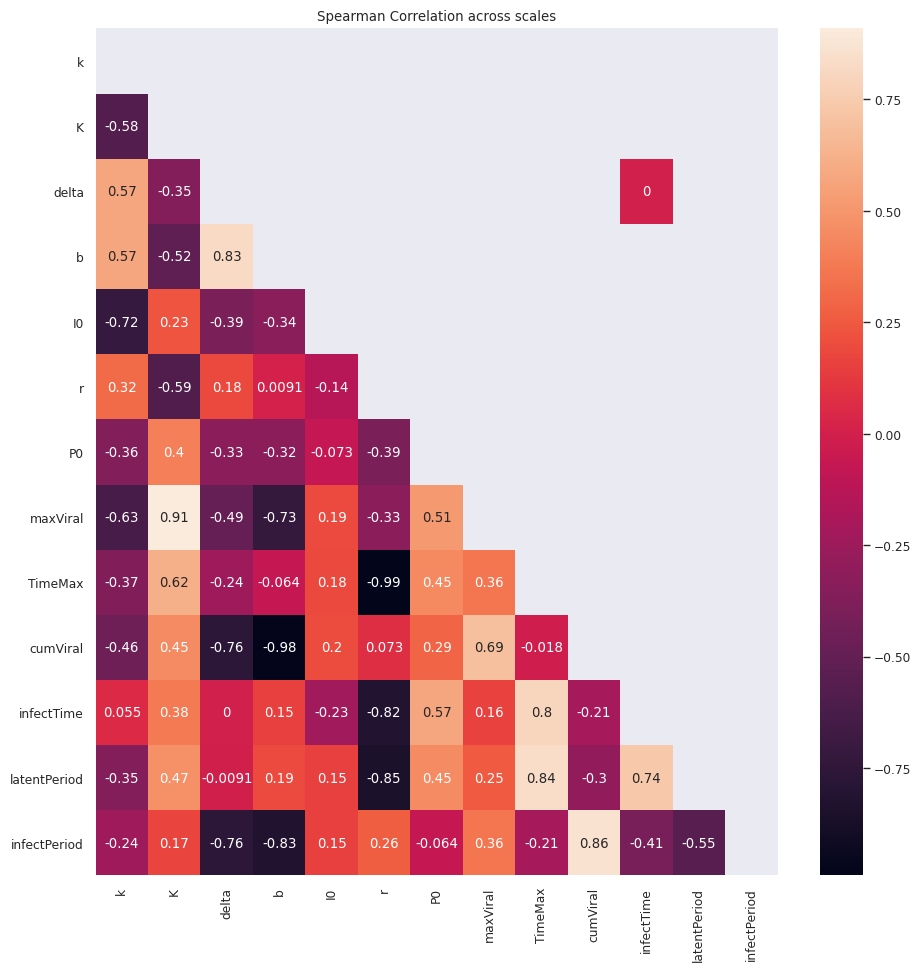

In [33]:
a = dfInd.corr(method='spearman') 
fig, ax = plt.subplots(figsize=(11,11)) 
matrix = np.triu(a)
A = sns.heatmap(a,annot=True,mask=matrix)
plt.title('Spearman Correlation across scales')
plt.show()

In [13]:
stats.spearmanr(dfInd['infectPeriod'],dfInd['delta'])

SpearmanrResult(correlation=-0.7636363636363637, pvalue=0.006233059747904751)

In [4]:

sns.set_context("paper", rc={"axes.labelsize":16})
h = sns.scatterplot(data=df, x="delta", y="infectPeriod",hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.xlabel(r'viral clearence rate')
plt.ylabel(r'infectious period')
plt.show()

h= sns.scatterplot(data=df, x="b", y="infectPeriod",hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.xlabel(r'adaptive activation rate')
plt.ylabel(r'infectious period')
plt.show()

sns.set_context("paper", rc={"axes.labelsize":16})
h = sns.scatterplot(data=dfMInd, y="cumviral", x="b",hue="ID",palette=['blue','green','red'],s=100)
plt.xlabel(r'Viral Growth Rate [$r$]')
plt.ylabel(r'Infectious Dose [$P_0$]')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Animal Husbandry')
plt.show()




ValueError: Could not interpret value `infectPeriod` for parameter `y`

In [1]:
h = sns.scatterplot(data=df, x="b", y="latentPeriod",hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.xlabel(r'viral growth rate')
plt.ylabel(r'latent period')
plt.show()

# sns.scatterplot(data=df, x="TimeMax", y="latentPeriod",hue='Serotype',palette = ["blue", "green", "red"])
# plt.xlabel(r'Time to max viral load')
# plt.ylabel(r'latent period')
# plt.show()

# sns.scatterplot(data=df, x="cumViral", y="infectPeriod",hue='Serotype',palette = ["blue", "green", "red"])
# plt.xlabel(r'cum. viral load')
# plt.ylabel(r'infectious period')
# plt.show()


NameError: name 'sns' is not defined

In [4]:
sns.scatterplot(data=df, x="r", y="infectTime",hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.xlabel(r'viral growth rate')
plt.ylabel(r'infection time')
plt.show()

ValueError: Could not interpret value `infectTime` for parameter `y`

For viral growth rate, we had previously observed that:
- viral growth rate determines the time to max viral titer; and
- viral growth rate is strongly negatively associated with initial viral dose (ie fast growing viruses have low infectious dose = more transmissible)

Now you have added that:
- quick viral growth growth rate means short time to infection (ie high transmissibility: this is cool that both in terms of timing and dose we are seeing the same thing here!
- quick viral growth rate means short latent period.

SO, your results with regard to viral growth rate also dovetail really nicely and complement each other across scales.
Here' how I would summarize:
Viral growth rate determines the pace of FMDV dynamics within and among hosts:
Fast-growing viruses are more transmissible: They reach susceptible hosts rapidly (infection time) and can transmit with a lower infectious dose (P0). This is reflected in the observed variation in transmission rate among viral strains as well (I think we should point this strong correlation out, given the other two results supporting growth rate ~ transmissibility link).
Viral growth rate also determines how rapidly a host becomes infectious after exposure, and how quickly the virus population reaches is maximum titer in the host.
Ie, viral growth rate appears to determine the initial part of the infection process within the host, and the pace of transmission dynamics at the population scale.


For adaptive immune responses, we previously saw, when looking at with-host parameters, that:
- adaptive activation rate  and cumulative viral load are practically synonymous (near perfect neg correlation), with -0.99 correlation coefficient.
- adaptive activation and clearance rates are quite strongly correlated (positive, 0.79).
[- as a result of both of the above, the correlation between adapt clearance and cum. viral load is also 0.79.]

Now you've added that:
- adaptive activation and clearance rates are both associated with infectious period, where strong / quick responses mean a shorter infectious period
(- I would leave out the infectious period / cum viral load correlation, because both of these are outcomes of fast / strong adaptive responses). 

SO, your results with regard to infectious period make perfect sense.
Here's how I would interpret these findings:
Adaptive immune responses determine how rapidly and FMDV infection is cleared by the buffalo:
Adaptive activation and clearance rates of FMDVs are strongly positively correlated in buffalo.
Together, these adaptive responses determine the period of viral growth within the buffalo, which defines the infectious period and determines viral production within each host (cumulative viral load). Variation among strains in the cumulative viral load they achieve may drive the likelihood of persistent infection (ie carrier probability. This looks like a strong correlation to me, similar to the viral growth - acute transmission link; may be worth showing, if that's right, given the strength of the individual results. And it fits right in with the gist of immunity determining clearance of infection).
Ie, adaptive immune response by the host appears to determine the tail end of the infection process within the host (how quickly the virus gets shut down).

These are incredibly strong and exciting results. Unless they're circular - which is something we need to think through, given within- and between host parameters were derived from the same set of data. We should discuss circularity, point by point, in our next meeting -? 
Once we answer that question for ourselves, for each of the correlations, we can proceed.

If we decide none of this is circular, I'll help you modify the results flow and abstract to take these findings into account, Caleb.

--Anna

In [ ]:
R_0 = ((mean duration of acute infectious)
       * (transmission rate of acute infectious))